# Exploratory Data Analysis for Model 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
import warnings

warnings.filterwarnings('ignore')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data_xls = pd.read_csv('green_tripdata_2018-01.csv')
data_xls.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-01-01 00:18:50,2018-01-01 00:24:39,N,1,236,236,5,0.70,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2,1.0
1,2,2018-01-01 00:30:26,2018-01-01 00:46:42,N,1,43,42,5,3.50,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0
2,2,2018-01-01 00:07:25,2018-01-01 00:19:45,N,1,74,152,1,2.14,10.0,0.5,0.5,0.0,0.0,NaN,0.3,11.3,2,1.0
3,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1.0
4,2,2018-01-01 00:32:40,2018-01-01 00:33:41,N,1,255,255,1,0.03,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0


In [4]:
data_xls.describe

<bound method NDFrame.describe of         VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0              2  2018-01-01 00:18:50   2018-01-01 00:24:39   
1              2  2018-01-01 00:30:26   2018-01-01 00:46:42   
2              2  2018-01-01 00:07:25   2018-01-01 00:19:45   
3              2  2018-01-01 00:32:40   2018-01-01 00:33:41   
4              2  2018-01-01 00:32:40   2018-01-01 00:33:41   
5              2  2018-01-01 00:38:35   2018-01-01 01:08:50   
6              2  2018-01-01 00:18:41   2018-01-01 00:28:22   
7              2  2018-01-01 00:38:02   2018-01-01 00:55:02   
8              2  2018-01-01 00:05:02   2018-01-01 00:18:35   
9              2  2018-01-01 00:35:23   2018-01-01 00:42:07   
10             2  2018-01-01 00:21:00   2018-01-01 00:39:04   
11             2  2018-01-01 00:56:29   2018-01-01 01:04:44   
12             2  2018-01-01 00:11:48   2018-01-01 00:30:13   
13             2  2018-01-01 00:57:59   2018-01-01 01:12:26   
14             2  201

In [5]:
data_xls.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                float64
dtype: object

In [6]:
data_xls.size

15077051

# Visualize the relationship between the features and the response using scatterplots

In [7]:
df1 = data_xls.iloc[:,5:14]

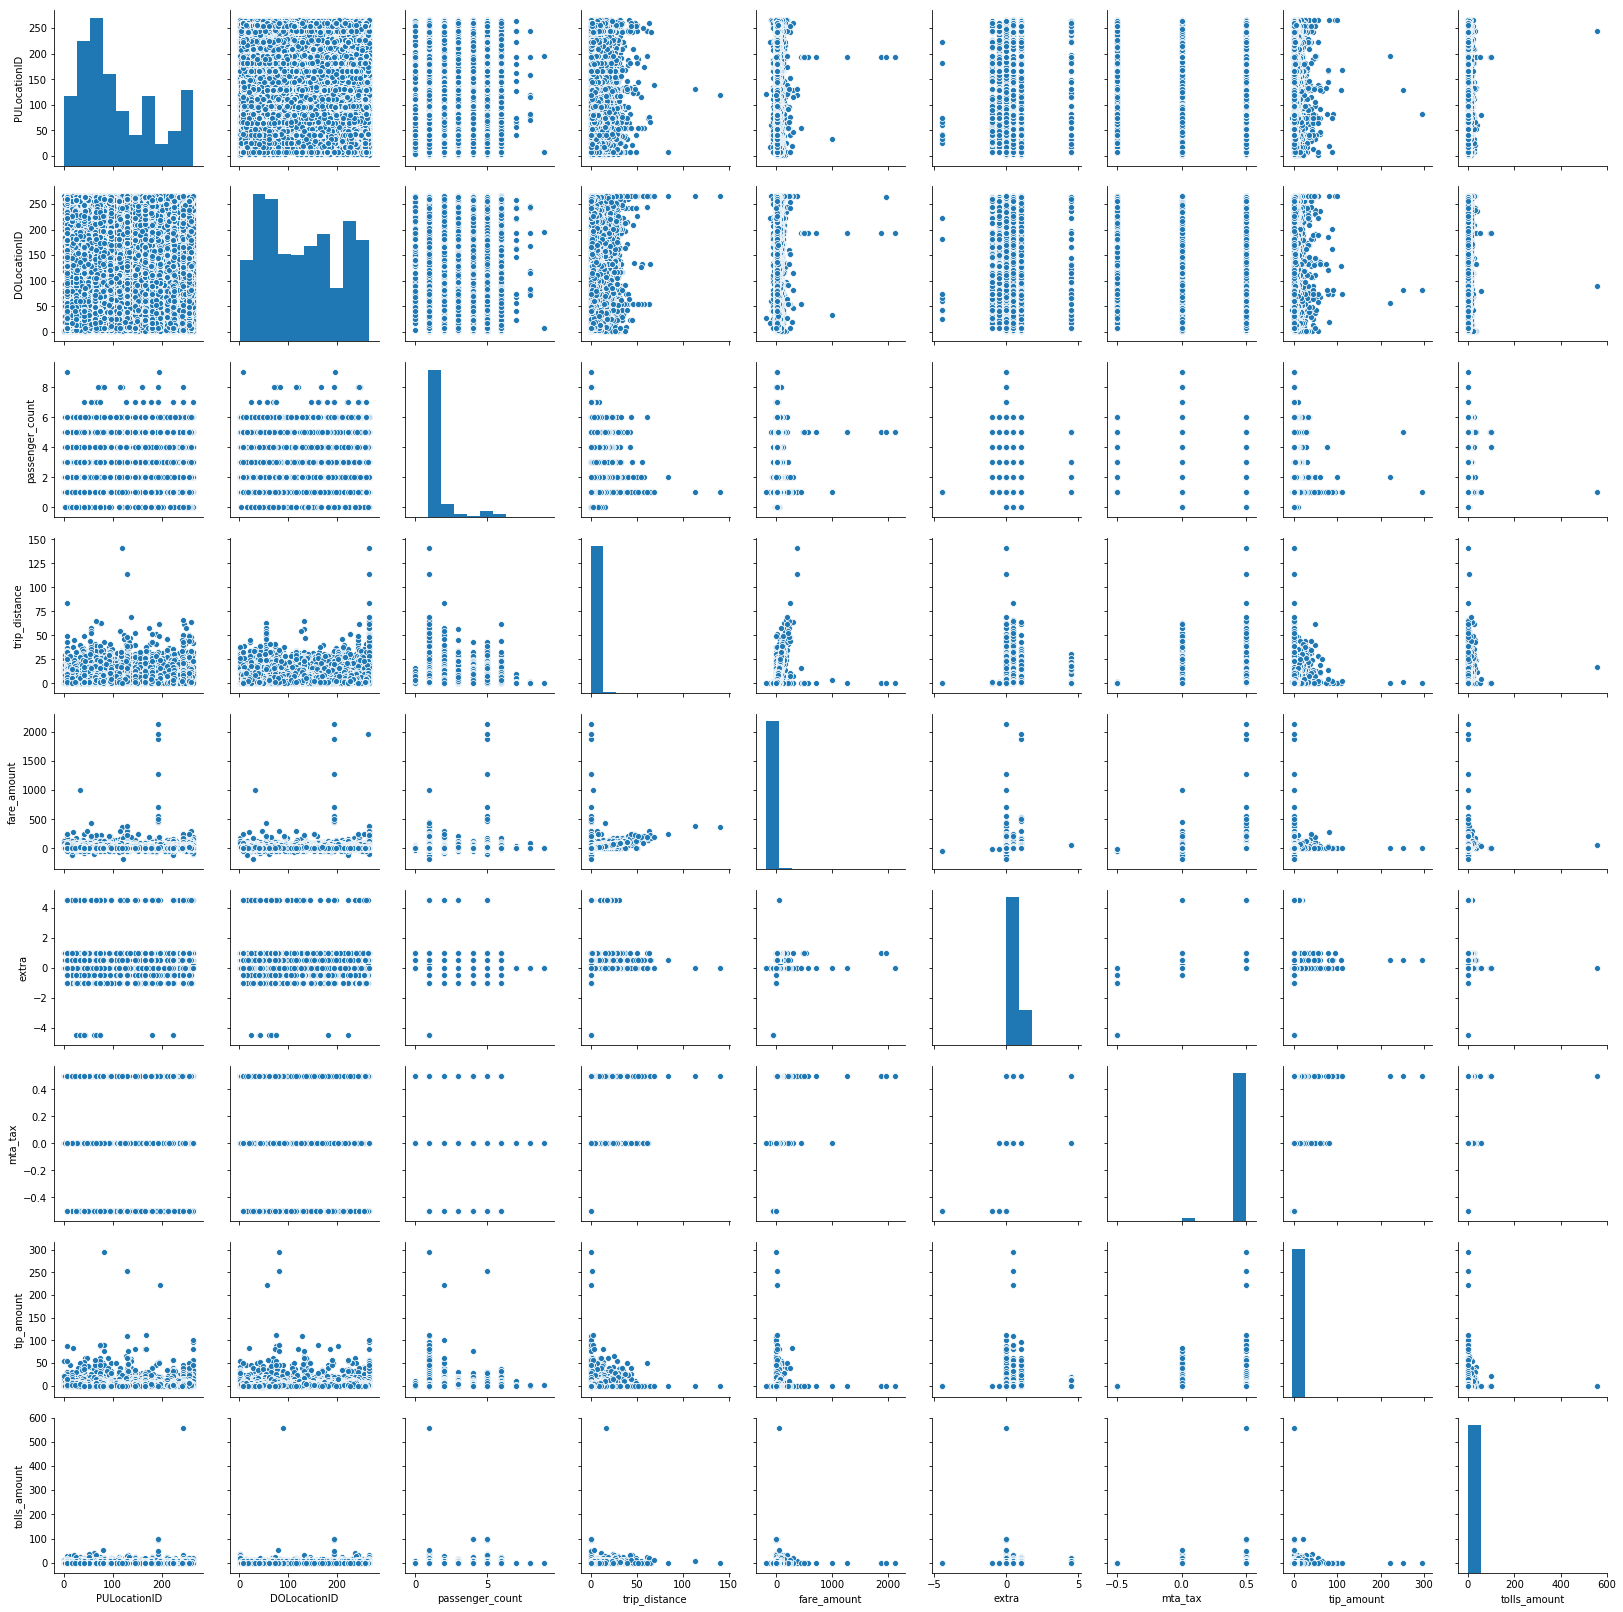

In [8]:
sns.pairplot(df1)

# Are any model assumptions violated?
## 1)Linear relationship :
Plotting a Scatter plot.Assumption 1: To check if their is a linear relationship in the model.Linear regression needs the relationship between the independent and dependent variables to be linear.The linearity assumption can best be tested with scatter plots,the following examples depict all the cases, where no and little linearity is present.

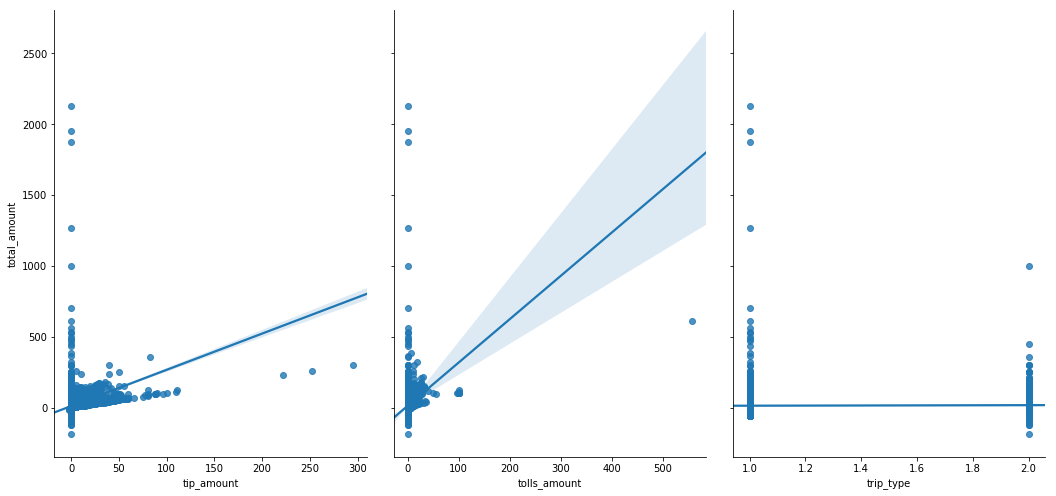

In [9]:
sns.pairplot(data_xls, x_vars=['tip_amount','tolls_amount','DOLocationID'], y_vars='total_amount', size=7, aspect=0.7, kind='reg')

## Is the relationship significant?
As the p-value is much less than 0.05, we reject the null hypothesis that β = 0.Hence there is a significant relationship between the variables in the linear regression model of the dataset. Hence, the model has a significant relationship.

In [25]:
model = ols("total_amount ~ tip_amount + tolls_amount + DOLocationID-1", data=data_xls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 4.338e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:32:47   Log-Likelihood:            -3.0284e+06
No. Observations:              793529   AIC:                         6.057e+06
Df Residuals:                  793526   BIC:                         6.057e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
tip_amount       2.9649      0.006    460.760      0.000       2.952       2.978
tolls_amount     2.4942      0.012    204.675      0.000       2.470       2.518
DOLocationID     0.0627   9.18e-05    682.667      0.000       0.063       0.063
==============================================================================
Omnibus:                  2063797.693   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     807707597535.885
Skew:                          28.931   Prob(JB):                         0.00
Kurtosis:                    4945.214   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2)Multivariate Normality:
Plotting a Q-Q plot for the model.Assumption 2: To check for multivariate normality in the model.This assumption can best be checked with a Q-Q-Plot.Normality can be checked with a goodness of fit test.Below graphs shows that the variables are multivariate normal

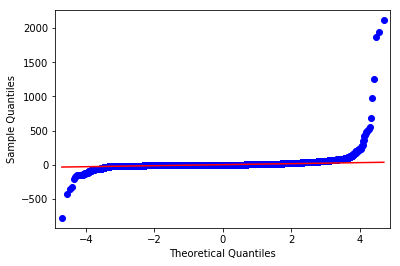

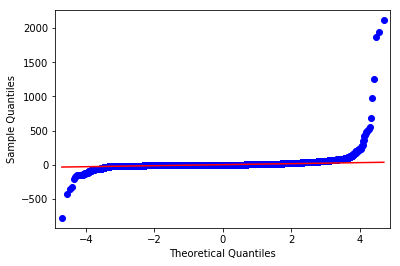

In [11]:
#Q-Q plot to check multivariate normality
import statsmodels.api as statmodel
plot= model.resid
statmodel.qqplot(plot,line='r')

# 3) Checking for Multicollinearity:
Multicollinearity may be tested with three central criteria:

# 1) Correlation matrix :
All the values are <=1.Hence, the model is near to accuracy

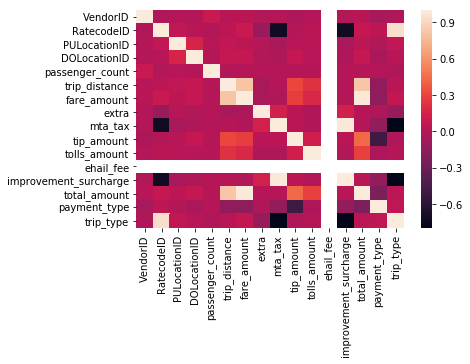

In [12]:
sns.heatmap(data_xls.corr())

In [13]:
data_xls.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
VendorID,1.000000,-0.018102,0.008401,-0.001251,0.092104,0.024449,0.031129,-0.006734,-0.002079,-0.029719,0.001479,NaN,-0.003082,0.024435,-0.054485,-0.012279
RatecodeID,-0.018102,1.000000,0.056043,0.023705,-0.008791,0.046228,0.094818,-0.104791,-0.724162,-0.001841,0.027089,NaN,-0.710358,0.076432,0.041722,0.937916
PULocationID,0.008401,0.056043,1.000000,0.160510,0.017459,0.054496,0.043526,0.016584,-0.050710,0.022731,0.018792,NaN,-0.050318,0.045705,-0.006944,0.057118
DOLocationID,-0.001251,0.023705,0.160510,1.000000,0.006421,0.081727,0.069612,-0.009111,-0.012839,0.072450,0.014161,NaN,-0.014187,0.077096,-0.037394,0.020263
passenger_count,0.092104,-0.008791,0.017459,0.006421,1.000000,0.003049,0.006089,0.008839,0.006808,0.003340,0.007132,NaN,0.006515,0.007450,0.000338,-0.010348
trip_distance,0.024449,0.046228,0.054496,0.081727,0.003049,1.000000,0.815736,-0.046510,0.000471,0.312807,0.226666,NaN,0.006901,0.821364,-0.138584,0.021619
fare_amount,0.031129,0.094818,0.043526,0.069612,0.006089,0.815736,1.000000,-0.043465,-0.013743,0.273192,0.182370,NaN,-0.004206,0.979254,-0.142761,0.067395
extra,-0.006734,-0.104791,0.016584,-0.009111,0.008839,-0.046510,-0.043465,1.000000,0.143144,0.027688,-0.011167,NaN,0.142657,0.000696,-0.013914,-0.111163
mta_tax,-0.002079,-0.724162,-0.050710,-0.012839,0.006808,0.000471,-0.013743,0.143144,1.000000,0.026651,-0.015454,NaN,0.983917,0.007933,-0.133973,-0.791048
tip_amount,-0.029719,-0.001841,0.022731,0.072450,0.003340,0.312807,0.273192,0.027688,0.026651,1.000000,0.129161,NaN,0.032437,0.436925,-0.498141,-0.018603


# 2)Test for tolerance:
 T = 1 – R² 
   = 1 – 0.706
   = 0.294
With T < 0.1 there might be multicollinearity in the data and with T < 0.01 there certainly is.Hence, there is no multicolinearity in the model.

# Checking for Multicolinearity
3) Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables. VIF = 1/ 0.294 = 3.401360544217687 In the above model, Multicollinearity is not present.

# Check for Autocorrelation
Durbin-Watson’s d tests the null hypothesis while performing auto-correlation Value of d = 1.9 As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data

# 4)Homoscedasticity Test
By plotting scatter plot we can check for Homoscedasticity.

In [16]:
model = ols("total_amount ~ tip_amount -1", data=data_xls).fit()
Y_pred = model.predict(data_xls[["tip_amount"]])
residual = data_xls["total_amount"].values-Y_pred
residual

0          7.300000
1         15.800000
2         11.300000
3         -4.300000
4          4.300000
5         22.300000
6          9.800000
7          2.907535
8         11.300000
9          8.800000
10        17.800000
11         8.300000
12        18.300000
13        -2.866793
14         3.980424
15        -2.939682
16         3.132355
17        23.300000
18         4.800000
19         5.225577
20         5.800000
21        10.300000
22         8.813990
23        -2.143677
24         9.900530
25         1.803408
26        -0.245248
27        -0.545703
28         3.367588
29         1.711397
            ...    
793499     7.300000
793500     3.720106
793501     2.355471
793502    10.300000
793503     4.655736
793504    24.300000
793505    21.300000
793506     8.300000
793507     1.895418
793508     6.820636
793509     5.300000
793510     6.800000
793511     7.300000
793512    -1.075047
793513     4.029439
793514    32.300000
793515     1.895418
793516    17.300000
793517     3.643619


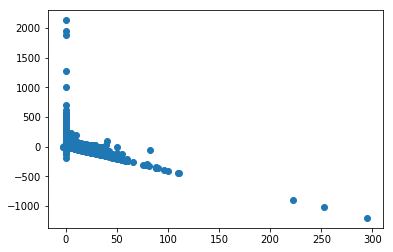

In [17]:
plt.scatter(data_xls[["tip_amount"]],residual)
plt.show()

# Fitting the Model 3:

In [26]:
cols_to_use = ['tip_amount','tolls_amount','DOLocationID']
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train

(        tip_amount  tolls_amount  DOLocationID
 570273        2.15          0.00             3
 511189        0.00          0.00           129
 259380        1.16          0.00           181
 534735        0.20          0.00            82
 388507        0.00          0.00            70
 424842        3.66          0.00           100
 174548        0.00          0.00            75
 38411         0.00          0.00           129
 303576        4.16          0.00            75
 80644         0.00          0.00           247
 673964        1.70          0.00           148
 745833        0.00          0.00           189
 452245        3.00          0.00           158
 135100        0.00          0.00           223
 326757        0.00          0.00           157
 495603        0.00          0.00           260
 766875        1.65          0.00             7
 696378        3.00          0.00           142
 715011        3.69          0.00            61
 676263        1.40          0.00       

In [28]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

10.517652948595636 [2.36575058 2.48111615 0.00640708]


In [29]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_amount   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                 4.338e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:35:08   Log-Likelihood:            -3.0284e+06
No. Observations:              793529   AIC:                         6.057e+06
Df Residuals:                  793526   BIC:                         6.057e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
tip_amount       2.9649      0.006    460.760      0.000       2.952       2.978
tolls_amount     2.4942      0.012    204.675      0.000       2.470       2.518
DOLocationID     0.0627   9.18e-05    682.667      0.000       0.063       0.063
==============================================================================
Omnibus:                  2063797.693   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     807707597535.885
Skew:                          28.931   Prob(JB):                         0.00
Kurtosis:                    4945.214   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Ranking of AIC BIC and R^2
The values of AIC and BIC ranges in the between 2-6 which tells us that we have a positive value and gives us a better fit.

In [30]:
reg = linear_model.LinearRegression()
reg.fit(data_xls[['tolls_amount', 'tip_amount', 'DOLocationID']], data_xls.total_amount)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
reg.coef_

array([2.48111615, 2.36575058, 0.00640708])

In [32]:
reg.intercept_

10.517652948593378

In [33]:
list(zip(X_test, reg.coef_))

[('tip_amount', 2.481116145169771),
 ('tolls_amount', 2.3657505753110355),
 ('DOLocationID', 0.006407075424463837)]

In [34]:
# 0.01,0.86,1.
y = reg.predict(X_test)

In [52]:
reg.predict([[75,1.86,0.1]])

array([12.58918305])

# Cross Validation of the model
After performing cross validation using K folds, the MAE output is non-negative floating point.Which tells that it is trained better and performing well.



In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [54]:
cols_to_use = ['tolls_amount', 'tip_amount', 'DOLocationID']
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [55]:
# 10-fold cross-validation with all three features
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-3.5601277  -3.37515705 -3.44299885]


In [56]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.5601277  3.37515705 3.44299885]


In [58]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88683007 1.83716005 1.85553196]


In [59]:
# calculate the average RMSE
print(rmse_scores.mean())

1.8598406925801552


In [60]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 3.459428


# R^2 value after fitting the Model

In [61]:
multi_lingreg = LinearRegression()

In [62]:
cols_to_use = ['tolls_amount', 'tip_amount', 'DOLocationID']
X = data_xls[cols_to_use]
y = data_xls.total_amount

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_train, X_test, y_train

(        tolls_amount  tip_amount  DOLocationID
 570273          0.00        2.15             3
 511189          0.00        0.00           129
 259380          0.00        1.16           181
 534735          0.00        0.20            82
 388507          0.00        0.00            70
 424842          0.00        3.66           100
 174548          0.00        0.00            75
 38411           0.00        0.00           129
 303576          0.00        4.16            75
 80644           0.00        0.00           247
 673964          0.00        1.70           148
 745833          0.00        0.00           189
 452245          0.00        3.00           158
 135100          0.00        0.00           223
 326757          0.00        0.00           157
 495603          0.00        0.00           260
 766875          0.00        1.65             7
 696378          0.00        3.00           142
 715011          0.00        3.69            61
 676263          0.00        1.40       

In [64]:
multi_lingreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
r_square = multi_lingreg.score(X, y)
r_square

0.24403987050697795